In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
import os
import shutil
parent_path = "C:/Users/ivand/Documents/Diplom/"
# re-arrange the dataset
fl = open('./archive/meta/meta/classes.txt')
# mode 
mode = 0o666
cls = fl.readline()
while(cls):
    # print(cls)
    os.makedirs(parent_path + f"working/testset/{cls}".replace("\n", ""))
    cls = fl.readline()

# Moving test files to testset/, train files will be left.
testfile = open('./archive/meta/meta/test.txt')
img = testfile.readline().strip()
while(img):
    cls = img.split('/')[0]
    print(cls)
    shutil.move( f"./archive/images/{img}.jpg".replace("\n", ""), f"./working/testset/{cls}/".replace("\n", ""))
    print(f'\r{img}',end='')
    img = testfile.readline().strip()

apple_pie
apple_pie/1011328apple_pie
apple_pie/101251apple_pie
apple_pie/1034399apple_pie
apple_pie/103801apple_pie
apple_pie/1038694apple_pie
apple_pie/1047447apple_pie
apple_pie/1068632apple_pie
apple_pie/110043apple_pie
apple_pie/1106961apple_pie
apple_pie/1113017apple_pie
apple_pie/116705apple_pie
apple_pie/1167170apple_pie
apple_pie/1174330apple_pie
apple_pie/1180600apple_pie
apple_pie/1235282apple_pie
apple_pie/1269202apple_pie
apple_pie/1272958apple_pie
apple_pie/1284428apple_pie
apple_pie/1295996apple_pie
apple_pie/129668apple_pie
apple_pie/1321400apple_pie
apple_pie/1327259apple_pie
apple_pie/1332030apple_pie
apple_pie/1364847apple_pie
apple_pie/1375404apple_pie
apple_pie/1398774apple_pie
apple_pie/1420999apple_pie
apple_pie/1429866apple_pie
apple_pie/1444702apple_pie
apple_pie/1461580apple_pie
apple_pie/1469191apple_pie
apple_pie/1472631apple_pie
apple_pie/1510125apple_pie
apple_pie/1510930apple_pie
apple_pie/1514110apple_pie
apple_pie/1526484apple_pie
apple_pie/1578710apple_

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import tensorflow as tf

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
)

In [17]:
batch_size = 128

train_data = train_datagen.flow_from_directory(
    './archive/images/',
    batch_size=batch_size,
    target_size=(224, 224),
    shuffle=True,
)
valid_data = valid_datagen.flow_from_directory(
    './working/testset/',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
)

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [18]:
def visualize_images(images,labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_data.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            lbl = np.argmax(labels[img_no])

            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[lbl])
            ax[i,j].set_axis_off()
            img_no+=1

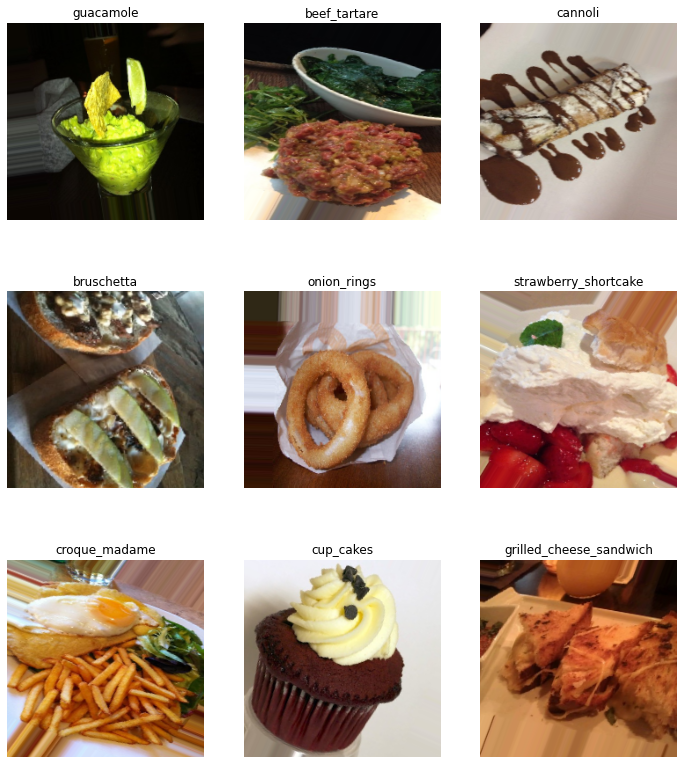

In [19]:
images, labels = next(train_data)
visualize_images(images,labels)

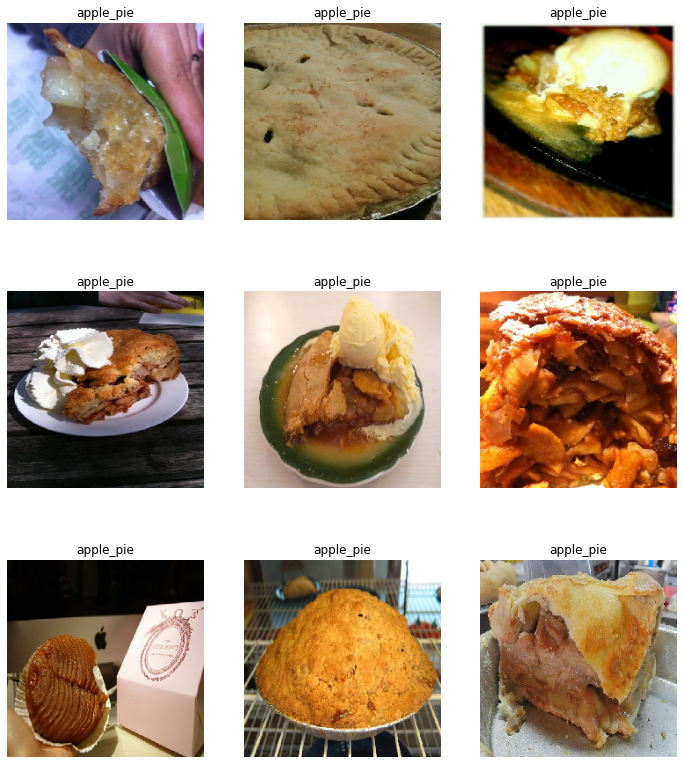

In [20]:
images, labels = next(valid_data)
visualize_images(images,labels)

In [21]:
base = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base.trainable = True
model = tf.keras.Sequential()
model.add(base)
# model.add(Flatten())
model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(101, activation='softmax'))
# opt = SGD(lr=0.001, momentum=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [22]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)
log = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log,write_graph=False,update_freq=100)
chkp = tf.keras.callbacks.ModelCheckpoint('drive/MyDrive/mobilenetv2_tuned.h5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [23]:
history = model.fit(train_data, 
                    epochs=20,
                    validation_data = valid_data,
                    callbacks=[early_stop, reduce_lr, tensorboard, chkp])

Epoch 1/20
592/592 [==============================] - ETA: 0s - loss: 3.1173 - accuracy: 0.2843 
Epoch 1: val_accuracy improved from -inf to 0.01105, saving model to drive/MyDrive\mobilenetv2_tuned.h5
592/592 [==============================] - 7782s 13s/step - loss: 3.1173 - accuracy: 0.2843 - val_loss: 18.8360 - val_accuracy: 0.0110 - lr: 0.0010
Epoch 2/20
592/592 [==============================] - ETA: 0s - loss: 2.1317 - accuracy: 0.4868
Epoch 2: val_accuracy improved from 0.01105 to 0.01826, saving model to drive/MyDrive\mobilenetv2_tuned.h5
592/592 [==============================] - 6169s 10s/step - loss: 2.1317 - accuracy: 0.4868 - val_loss: 11.4266 - val_accuracy: 0.0183 - lr: 0.0010
Epoch 3/20
592/592 [==============================] - ETA: 0s - loss: 1.8208 - accuracy: 0.5588
Epoch 3: val_accuracy improved from 0.01826 to 0.04867, saving model to drive/MyDrive\mobilenetv2_tuned.h5
592/592 [==============================] - 6147s 10s/step - loss: 1.8208 - accuracy: 0.5588 - val

In [24]:
preds = model.predict(valid_data)

198/198 [==============================] - 400s 2s/step


In [25]:
out = preds.argmax(axis=1)
out.shape

(25250,)

In [26]:
from sklearn.metrics import accuracy_score
val_acc = accuracy_score(valid_data.labels,out)
print(f'Validation Accuracy: {val_acc:.2f}') 

Validation Accuracy: 0.80


In [27]:
import time
inp = np.random.randint(0,255,(1,224,224,3))
t1 = time.time()
out = model.predict(inp)
t2 = time.time()
print(f'Inference Time: {t2-t1}')
print(f'FPS: {1/(t2-t1)}')

1/1 [==============================] - 1s 706ms/step
Inference Time: 0.7929980754852295
FPS: 1.2610371083033305


In [28]:
model.save("food_recog_80.h5")